<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L03-Learning%20to%20Classify%20Text/Note_03_Classical_Machine_Learning_Approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- This section focuses on applying classical machine learning algorithms for text classification. These methods use mathematical models to learn patterns from labeled training data and predict the category of new, unseen text.
- Classical machine learning techniques provide solid foundations for text classification, especially when data size is limited or when computational resources are constrained.



#### 3.1 **Overview of Classical Algorithms**


##### 1.**Naive Bayes Classifier**:
  - Based on Bayes' Theorem, it assumes that features (words) are conditionally independent given the class label.
  - Suitable for text classification tasks like spam detection due to its simplicity and efficiency.
  - Variants include:
    - **Multinomial Naive Bayes**: Used for discrete data like word counts.
    - **Bernoulli Naive Bayes**: Suitable for binary data (e.g., word presence or absence).
    - **Gaussian Naive Bayes**: Applied when features are continuous (less common in text classification).


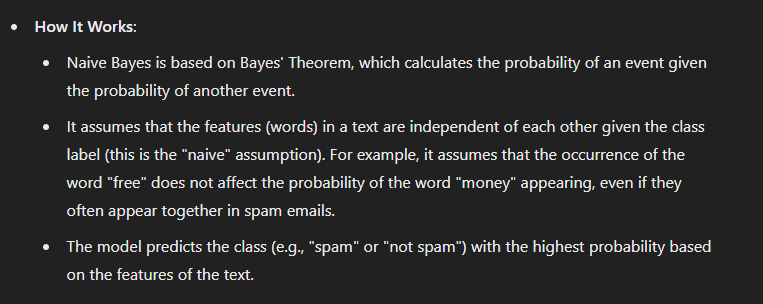

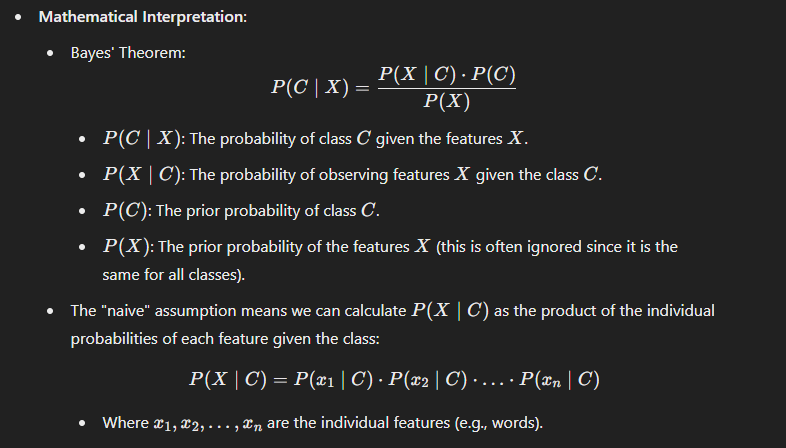

##### 2.**Decision Trees**:
  - Use a tree-like structure where each internal node represents a feature (word) and each branch represents a decision based on the feature value.
  - The leaves represent the class labels.
  - Concepts:
    - **Entropy and Information Gain**: Measures used to decide which feature to split on at each node.
    - **Pruning**: A technique to avoid overfitting by limiting the tree depth or merging nodes.


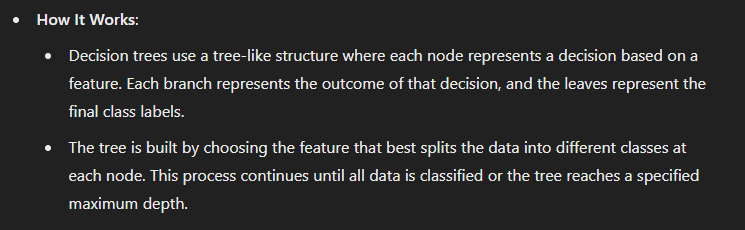

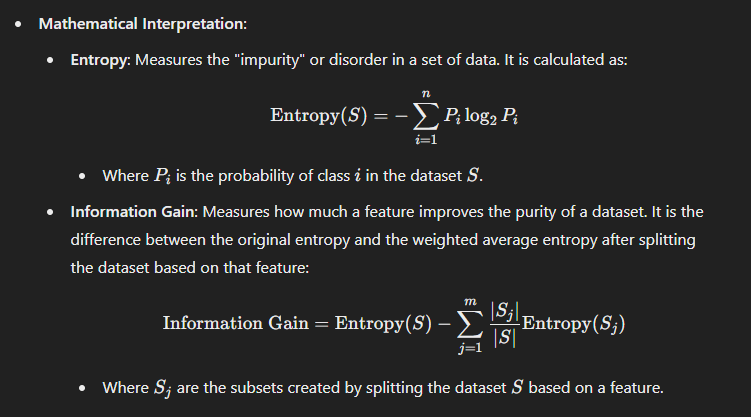

##### 3.**Logistic Regression (Maximum Entropy Classifier)**:
  - A probabilistic model based on the logistic function that estimates the probability of a class given the input features.
  - Unlike Naive Bayes, it does not assume feature independence.
  - Often used as a baseline model for text classification.


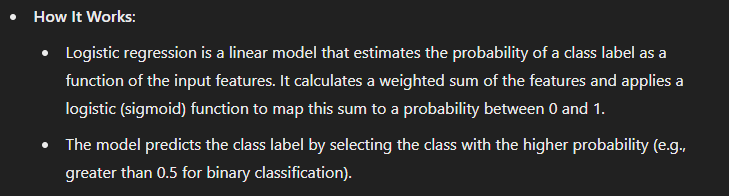

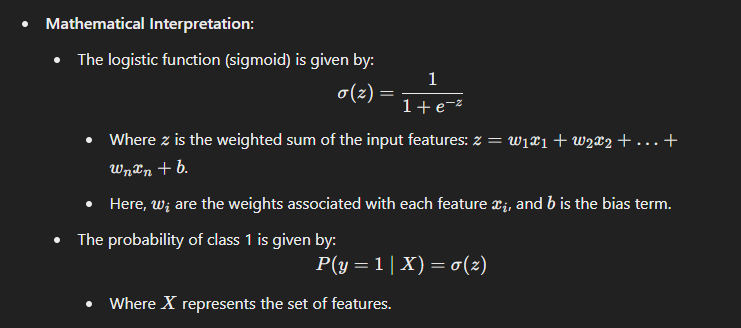

##### 4.**Support Vector Machines (SVMs)**:
  - Find the optimal hyperplane that separates classes in a high-dimensional space.
  - Use kernel functions (e.g., linear, polynomial, RBF) to handle non-linear decision boundaries.
  - Effective for high-dimensional data like text but may be computationally expensive for very large datasets.



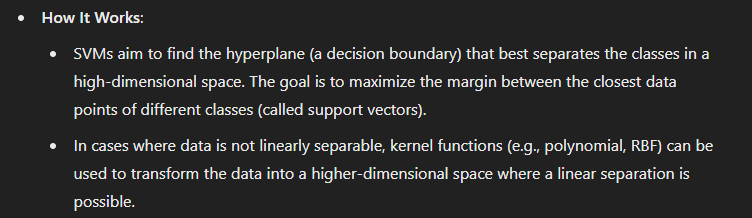

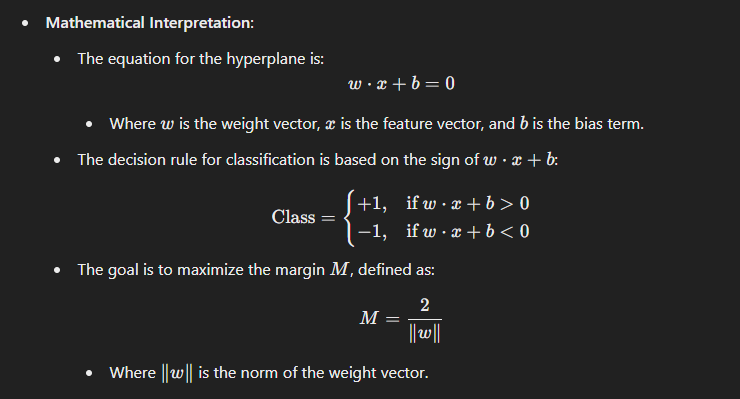

#### 3.2 **Feature Selection in Classical Models**


##### **Importance of Feature Selection**:
  - Selecting the right features can significantly improve model performance and reduce overfitting.


##### **Techniques for Feature Selection**:
  - **Manual Selection**: Based on domain knowledge (e.g., specific keywords).
  - **Automated Methods**:
    - **Chi-square Test**: Measures how much each feature contributes to distinguishing between classes.
    - **Mutual Information**: Evaluates the dependency between features and the target label.
    - **Recursive Feature Elimination (RFE)**: Iteratively removes less important features based on model weights.



###### 1. Manual Selection Based on Domain Knowledge

- Manual feature selection involves choosing specific features based on domain knowledge or experience.
- In text classification, this could mean selecting certain words or phrases that are known to be good indicators of a particular class.



In [ ]:
# Example text data
documents = [
    "The movie was fantastic and I loved it.",
    "The film was boring and very slow.",
    "What a thrilling and captivating movie!",
    "The plot was dull and the acting was poor.",
    "An excellent performance by the cast.",
]

# Manually selected features (domain knowledge)
# Here we select some sentiment-related words that we believe indicate positive or negative sentiment
selected_features = ['fantastic', 'boring', 'thrilling', 'dull', 'excellent']

# Feature extraction function
def extract_manual_features(document):
    words = set(document.lower().split())  # Tokenize and convert to lowercase
    features = {}
    for word in selected_features:
        features[f'contains({word})'] = (word in words)  # Check if each selected word is in the document
    return features

# Example usage of manual feature extraction
for doc in documents:
    print(f"Document: {doc}")
    print("Features:", extract_manual_features(doc))
    print("-" * 50)


Document: The movie was fantastic and I loved it.
Features: {'contains(fantastic)': True, 'contains(boring)': False, 'contains(thrilling)': False, 'contains(dull)': False, 'contains(excellent)': False}
--------------------------------------------------
Document: The film was boring and very slow.
Features: {'contains(fantastic)': False, 'contains(boring)': True, 'contains(thrilling)': False, 'contains(dull)': False, 'contains(excellent)': False}
--------------------------------------------------
Document: What a thrilling and captivating movie!
Features: {'contains(fantastic)': False, 'contains(boring)': False, 'contains(thrilling)': True, 'contains(dull)': False, 'contains(excellent)': False}
--------------------------------------------------
Document: The plot was dull and the acting was poor.
Features: {'contains(fantastic)': False, 'contains(boring)': False, 'contains(thrilling)': False, 'contains(dull)': True, 'contains(excellent)': False}
-----------------------------------------

###### 2. Automated Feature Selection Using Chi-square Test


- The Chi-square test measures the association between a feature and the target class.
- It helps determine which words (features) are most informative for distinguishing between classes.



In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
import numpy as np

# Example text data and labels
documents = [
    "The movie was fantastic and I loved it.",
    "The film was boring and very slow.",
    "What a thrilling and captivating movie!",
    "The plot was dull and the acting was poor.",
    "An excellent performance by the cast.",
]
labels = [1, 0, 1, 0, 1]  # 1 for positive sentiment, 0 for negative sentiment

# Step 1: Convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# Step 2: Perform Chi-square test to select the top features
chi2_scores, p_values = chi2(X, labels)

# Step 3: Sort features by their Chi-square scores
sorted_indices = np.argsort(chi2_scores)[::-1]
top_k = 5  # Select the top 5 features
top_features = [(feature_names[i], chi2_scores[i]) for i in sorted_indices[:top_k]]

# Display the top features based on Chi-square scores
print("Top features based on Chi-square test:")
for feature, score in top_features:
    print(f"{feature}: {score}")


Top features based on Chi-square test:
was: 2.0416666666666665
acting: 1.5
dull: 1.5
very: 1.5
slow: 1.5


###### 3. Automated Feature Selection Using Mutual Information


- Mutual information measures the dependency between a feature and the target label.
- High mutual information indicates that the presence (or absence) of the feature provides significant information about the class label.



In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Step 1: Convert the text data into a bag-of-words representation (already done in the previous code)
# We can reuse the 'X' matrix and 'feature_names' from the Chi-square example

# Step 2: Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X, labels, discrete_features=True)

# Step 3: Sort features by their mutual information scores
sorted_indices_mi = np.argsort(mi_scores)[::-1]
top_k_mi = 5  # Select the top 5 features based on mutual information
top_features_mi = [(feature_names[i], mi_scores[i]) for i in sorted_indices_mi[:top_k_mi]]

# Display the top features based on mutual information
print("\nTop features based on Mutual Information:")
for feature, score in top_features_mi:
    print(f"{feature}: {score}")



Top features based on Mutual Information:
was: 0.3957527947852782
the: 0.2911031660323686
movie: 0.2911031660323686
acting: 0.22314355131420974
very: 0.22314355131420974


###### 4. Automated Feature Selection Using Recursive Feature Elimination (RFE)


- RFE is an iterative method that starts with all features and removes the least important features one by one based on the model's performance, typically using a linear model or a decision tree.



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Step 1: Use Logistic Regression as the model for RFE
model = LogisticRegression()

# Step 2: Initialize RFE and fit the model to the data
rfe = RFE(model, n_features_to_select=3)  # Select the top 3 features
rfe.fit(X, labels)

# Step 3: Get the selected features
selected_features_rfe = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]

# Display the selected features
print("\nSelected features using RFE:")
for feature in selected_features_rfe:
    print(feature)



Selected features using RFE:
movie
very
was


#### 3.3 **Practical Implementations of Classical Machine Learning Models**


##### 1.**Naive Bayes Example**:
 **Step 1**: Preprocess the text using techniques like tokenization, stop word removal, and TF-IDF vectorization.


In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [category for category in movie_reviews.categories() for _ in movie_reviews.fileids(category)]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer with stop word removal
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words=nltk.corpus.stopwords.words('english'))

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Step 2**: Train a Naive Bayes model on the training set.


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model using the training data
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

**Step 3**: Evaluate the model using metrics like accuracy, precision, recall, and F1-score.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='pos')
recall = recall_score(y_test, y_pred, pos_label='pos')
f1 = f1_score(y_test, y_pred, pos_label='pos')

# Display the evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

# Display the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 80.00%
Precision: 81.35%
Recall: 78.11%
F1-score: 79.70%

Classification Report:
              precision    recall  f1-score   support

         neg       0.79      0.82      0.80       199
         pos       0.81      0.78      0.80       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



##### 2.**Decision Trees Example**:


**Step 1**: Use preprocessed text and split the data into training and testing sets.


In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [category for category in movie_reviews.categories() for _ in movie_reviews.fileids(category)]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data into word counts
vectorizer = CountVectorizer(max_features=2000, stop_words=nltk.corpus.stopwords.words('english'))

# Fit and transform the training data, transform the test data
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Step 2**: Train a decision tree using features like word counts or n-grams.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
# Use 'entropy' as the criterion for splitting to minimize information gain
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

# Train the model using the training data
decision_tree_classifier.fit(X_train_counts, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

**Step 3**: Visualize the decision tree to understand the decision rules learned by the model.


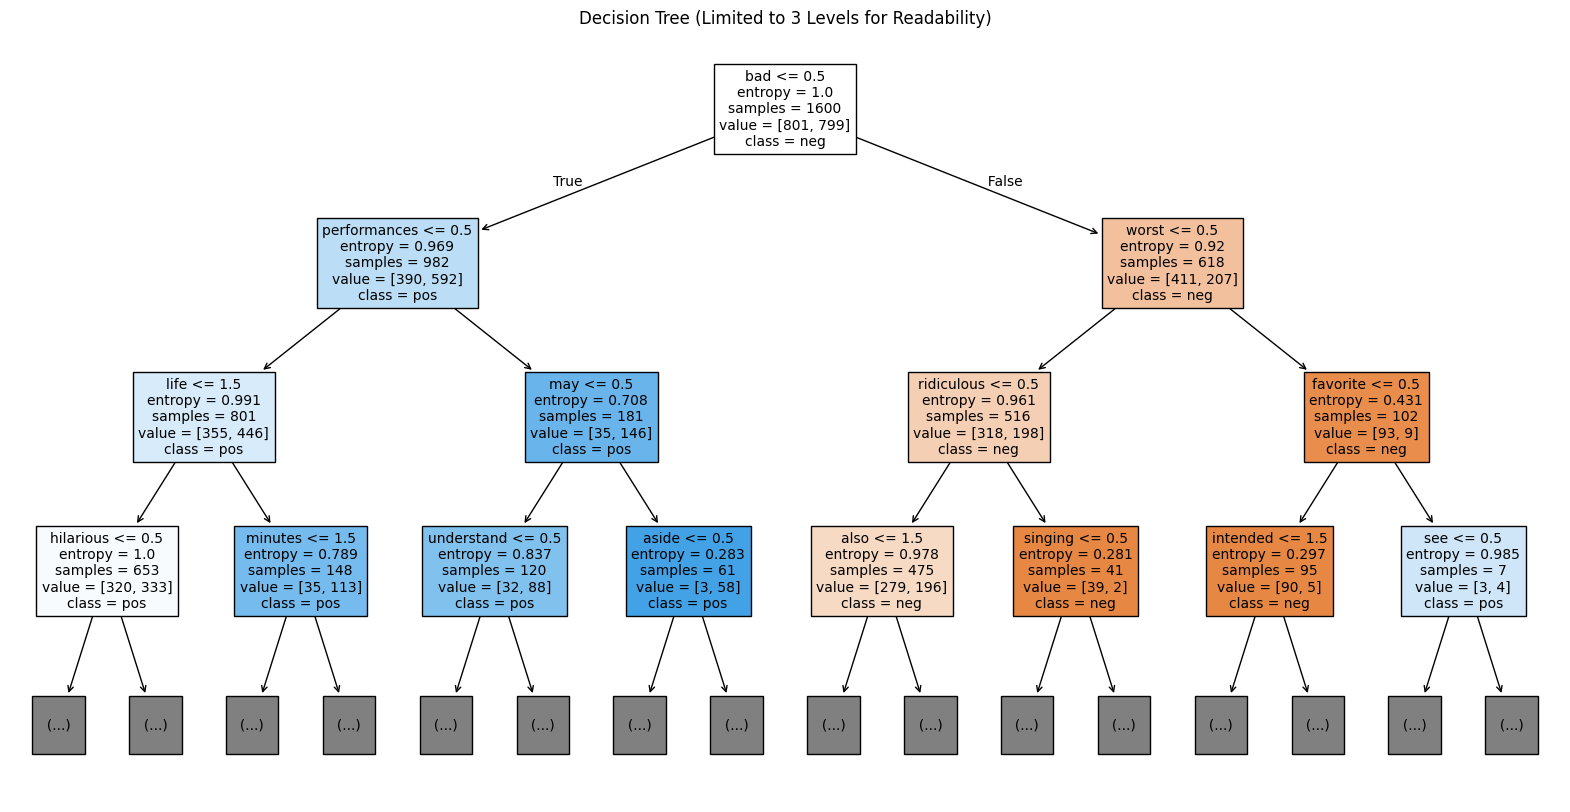

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree_classifier, max_depth=3, fontsize=10, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['neg', 'pos'])
plt.title('Decision Tree (Limited to 3 Levels for Readability)')
plt.show()


**Step 4**: Apply pruning techniques to avoid overfitting and improve generalization.


In [ ]:
# Pruning the tree by limiting its maximum depth and minimum samples per leaf
# This will help avoid overfitting and improve the model's generalization on new data
pruned_decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=42)

# Train the pruned model using the training data
pruned_decision_tree_classifier.fit(X_train_counts, y_train)

# Evaluate the pruned model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = pruned_decision_tree_classifier.predict(X_test_counts)

# Calculate the accuracy of the pruned model
accuracy_pruned = accuracy_score(y_test, y_pred)
print(f"Pruned Decision Tree Classifier Accuracy: {accuracy_pruned * 100:.2f}%")

# Display the classification report
print("\nClassification Report for Pruned Decision Tree:")
print(classification_report(y_test, y_pred))


Pruned Decision Tree Classifier Accuracy: 63.25%

Classification Report for Pruned Decision Tree:
              precision    recall  f1-score   support

         neg       0.67      0.52      0.59       199
         pos       0.61      0.74      0.67       201

    accuracy                           0.63       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.64      0.63      0.63       400



##### 3.**Logistic Regression Example**:


**Step 1**: Preprocess the text and transform it into numerical features using TF-IDF or embeddings.


In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [category for category in movie_reviews.categories() for _ in movie_reviews.fileids(category)]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.2, random_state=42)

# Use TF-IDF to convert the text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words=nltk.corpus.stopwords.words('english'))

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Step 2**: Train the logistic regression model, fine-tuning hyperparameters like regularization strength.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize Logistic Regression with solver and maximum iterations
logistic_regression = LogisticRegression(solver='liblinear', max_iter=1000)

# Define the hyperparameters to tune (C is the inverse of regularization strength)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Different values of regularization strength
    'penalty': ['l1', 'l2']        # L1 and L2 regularization
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the logistic regression model with the best hyperparameters
best_logistic_regression = grid_search.best_estimator_


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


**Step 3**: Evaluate the model on test data and perform error analysis to identify misclassified instances.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform error analysis using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Identifying some misclassified instances
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
print(f"\nNumber of Misclassified Instances: {len(misclassified_indices)}")
print("\nExamples of Misclassified Reviews:")
for index in misclassified_indices[:5]:  # Show the first 5 misclassified examples
    print(f"Review: {X_test[index]}")
    print(f"True Label: {y_test[index]}, Predicted Label: {y_pred[index]}")
    print("-" * 80)


Logistic Regression Model Accuracy: 84.00%

Classification Report:
              precision    recall  f1-score   support

         neg       0.84      0.83      0.84       199
         pos       0.84      0.85      0.84       201

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400


Confusion Matrix:
[[166  33]
 [ 31 170]]

Number of Misclassified Instances: 64

Examples of Misclassified Reviews:
Review: " the 44 caliber killer has struck again . " starring john leguizamo , mira sorvino , adrian brody , jennifer esposito , michael rispoli , bebe neuwirth . rated r . summer of sam will be remembered as a waste of spike lee ' s abilities . lee is a great filmmaker , often exhibiting kinetic visual flair on par with brian depalma and martin scorsese and a storytelling ability comparable to steven spielberg . but here , he gets himself into a bind . his latest effort is a case of 

##### 4.**SVM Example**

###### Step 1: Preprocess the text and transform it into numerical features using TF-IDF or embeddings.


In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [category for category in movie_reviews.categories() for _ in movie_reviews.fileids(category)]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.2, random_state=42)

# Use TF-IDF to convert the text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words=nltk.corpus.stopwords.words('english'))

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### Step 2: Train the SVM model, fine-tuning hyperparameters like regularization strength and kernel type.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the Support Vector Classifier (SVC)
svm = SVC()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Types of kernels to use
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the SVM model with the best hyperparameters
best_svm = grid_search.best_estimator_


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


###### Step 3: Evaluate the model on test data and perform error analysis to identify misclassified instances.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = best_svm.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform error analysis using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Identifying some misclassified instances
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
print(f"\nNumber of Misclassified Instances: {len(misclassified_indices)}")
print("\nExamples of Misclassified Reviews:")
for index in misclassified_indices[:5]:  # Show the first 5 misclassified examples
    print(f"Review: {X_test[index]}")
    print(f"True Label: {y_test[index]}, Predicted Label: {y_pred[index]}")
    print("-" * 80)


SVM Model Accuracy: 83.75%

Classification Report:
              precision    recall  f1-score   support

         neg       0.85      0.82      0.83       199
         pos       0.83      0.85      0.84       201

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400


Confusion Matrix:
[[164  35]
 [ 30 171]]

Number of Misclassified Instances: 65

Examples of Misclassified Reviews:
Review: " the 44 caliber killer has struck again . " starring john leguizamo , mira sorvino , adrian brody , jennifer esposito , michael rispoli , bebe neuwirth . rated r . summer of sam will be remembered as a waste of spike lee ' s abilities . lee is a great filmmaker , often exhibiting kinetic visual flair on par with brian depalma and martin scorsese and a storytelling ability comparable to steven spielberg . but here , he gets himself into a bind . his latest effort is a case of a director prete

#### 3.4 **Challenges in Using Classical Machine Learning Approaches**



##### **Curse of Dimensionality**:
  - Text data often has high dimensionality due to the large vocabulary size.
  - **Solution**: Use dimensionality reduction techniques like PCA or LSA, or limit the feature set.


Solution: Dimensionality Reduction with Principal Component Analysis (PCA)


In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [category for category in movie_reviews.categories() for _ in movie_reviews.fileids(category)]

# Use TF-IDF to convert the text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words=nltk.corpus.stopwords.words('english'))
X = tfidf_vectorizer.fit_transform(documents)

# Step 1: Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_reduced = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense format before PCA

# Display the shape of the original and reduced data
print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_reduced.shape}")


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original shape: (2000, 2000)
Reduced shape: (2000, 100)


##### **Handling Imbalanced Classes**:
  - Many real-world datasets are imbalanced (e.g., more "not spam" than "spam" emails).
  - **Solution**: Use techniques like oversampling, undersampling, or class weighting.


Solution: Using Class Weighting in the Classifier


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, labels, test_size=0.2, random_state=42)

# Step 1: Initialize the SVM with class weighting to handle imbalanced data
svm = SVC(class_weight='balanced', random_state=42)

# Step 2: Train the SVM model
svm.fit(X_train, y_train)

# Step 3: Make predictions and evaluate the model
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy (with class weighting): {accuracy * 100:.2f}%")

# Display the classification report to show the precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Model Accuracy (with class weighting): 78.75%

Classification Report:
              precision    recall  f1-score   support

         neg       0.80      0.77      0.78       199
         pos       0.78      0.81      0.79       201

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



##### **Feature Independence Assumption in Naive Bayes**:
  - Naive Bayes assumes that features are independent given the class label, which may not hold in practice.
  - **Solution**: Use more advanced models like logistic regression that do not make this assumption.


Solution: Using Complement Naive Bayes (an extension that reduces bias)


In [ ]:
from sklearn.naive_bayes import ComplementNB

# Step 1: Use the original TF-IDF features without dimensionality reduction
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 2: Train a Complement Naive Bayes model, which is more suitable for imbalanced data
cnb = ComplementNB()
cnb.fit(X_train_full, y_train_full)

# Step 3: Make predictions and evaluate the model
y_pred_cnb = cnb.predict(X_test_full)

# Calculate accuracy
accuracy_cnb = accuracy_score(y_test_full, y_pred_cnb)
print(f"Complement Naive Bayes Model Accuracy: {accuracy_cnb * 100:.2f}%")

# Display the classification report
print("\nClassification Report for Complement Naive Bayes:")
print(classification_report(y_test_full, y_pred_cnb))


Complement Naive Bayes Model Accuracy: 80.25%

Classification Report for Complement Naive Bayes:
              precision    recall  f1-score   support

         neg       0.79      0.81      0.80       199
         pos       0.81      0.79      0.80       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



#### 3.5 **Advantages and Limitations of Classical Machine Learning Models**
- **Advantages**:
  - **Efficiency**: Classical algorithms like Naive Bayes and logistic regression are computationally efficient and suitable for smaller datasets.
  - **Interpretability**: Decision trees provide visual explanations for decision-making.
  - **Baseline Performance**: Useful for establishing a baseline performance before using more complex models.
- **Limitations**:
  - **Limited Handling of Complex Patterns**: Cannot capture complex patterns in the data as well as deep learning models.
  - **Manual Feature Engineering Required**: Classical approaches often rely on manually crafted features, which may not be optimal.
  - **Scalability**: Some algorithms like SVMs may not scale well with very large datasets.



#### 3.6 **Model Evaluation Metrics**
- **Basic Metrics**:
  - **Accuracy**: The proportion of correctly classified instances.
  - **Precision**: The proportion of true positive predictions out of all positive predictions.
  - **Recall**: The proportion of true positive predictions out of all actual positives.
  - **F1-score**: The harmonic mean of precision and recall, providing a balanced metric for imbalanced data.
- **Confusion Matrix**:
  - Used to visualize the performance of the model across different classes.
  - Shows true positives, false positives, true negatives, and false negatives.
- **Advanced Metrics**:
  - **ROC-AUC**: Measures the trade-off between the true positive rate and false positive rate.
  - **Precision-Recall Curve**: Particularly useful for evaluating models on imbalanced datasets.

Discussed in Note 07

#### 3.7 **Hyperparameter Tuning for Classical Models**
- **Grid Search**:
  - Systematically tries combinations of hyperparameters (e.g., alpha for Naive Bayes, C for logistic regression).
- **Random Search**:
  - Randomly samples hyperparameter combinations, often faster than grid search.
- **Bayesian Optimization**:
  - Uses a probabilistic model to explore hyperparameters more efficiently.


Discussed in Note 07

#### 3.8 **Practical Considerations**
- **Combining Models**:
  - Use ensemble methods (e.g., bagging, boosting) to combine multiple classical models and improve accuracy.
- **Using Domain Knowledge for Feature Engineering**:
  - Domain-specific knowledge can improve feature selection and model performance.

Discussed in Note 07

#### 3.9 **Transition to the Next Section**
- This section has established a foundation in using classical machine learning techniques for text classification, focusing on algorithm selection, feature selection, and model evaluation.
- In the next section, we will move to **Deep Learning Approaches**, where we will explore advanced techniques that do not require manual feature engineering and can automatically learn hierarchical patterns in text data. The deep learning models will build upon the preprocessing steps covered earlier but will require different architectures, such as CNNs, RNNs, and transformers.